In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
titanic_train = pd.read_csv(r"C:\Users\sande\titanic\train.csv")
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_test= pd.read_csv(r"C:\Users\sande\titanic\test.csv")
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

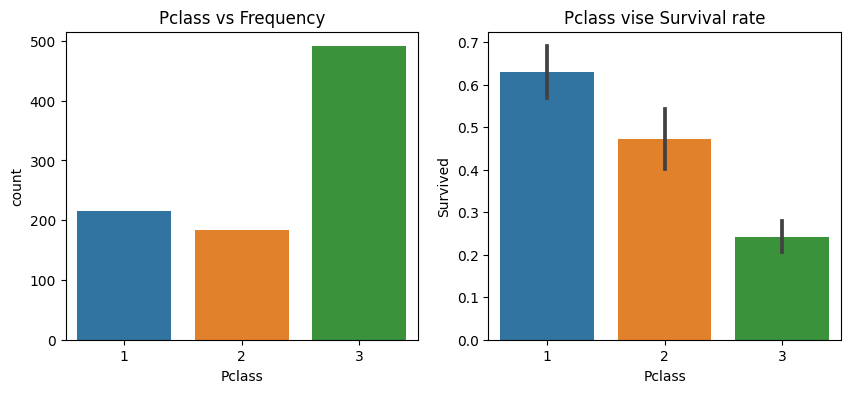

In [7]:
fx, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
Pclass_count = sns.countplot(data=titanic_train, x='Pclass', ax=axes[0])
Pclass_sr = sns.barplot(data=titanic_train, x='Pclass',y='Survived', ax=axes[1])

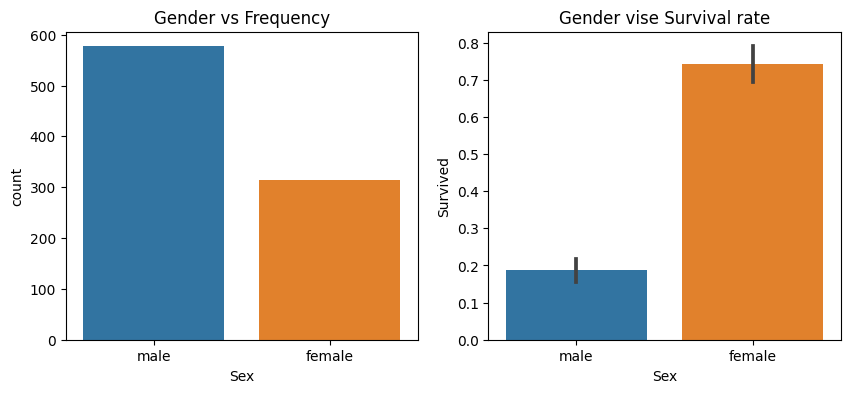

In [8]:
fx, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vise Survival rate")
fig1_gen = sns.countplot(data=titanic_train, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=titanic_train, x='Sex', y='Survived', ax=axes[1])

In [9]:
titanic_train['Title'] = titanic_train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
titanic_test['Title'] = titanic_test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [10]:
titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Miss"
}
titanic_train.Title = titanic_train.Title.map(titles)
titanic_test.Title = titanic_test.Title.map(titles)

In [11]:
print(titanic_train.Title.value_counts())
print(titanic_test.Title.value_counts())

Mr         517
Miss       185
Mrs        127
Master      40
Officer     18
Royalty      4
Name: Title, dtype: int64
Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64


In [12]:
grouped_train = titanic_train.groupby(['Sex','Pclass', 'Title']) 
grouped_train.Age.median()



Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    33.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [13]:
grouped_test = titanic_test.groupby(['Sex','Pclass', 'Title']) 
grouped_test.Age.median()

Sex     Pclass  Title  
female  1       Miss       32.0
                Mrs        48.0
                Royalty    39.0
        2       Miss       19.5
                Mrs        29.0
        3       Miss       22.0
                Mrs        28.0
male    1       Master      9.5
                Mr         42.0
                Officer    53.0
        2       Master      5.0
                Mr         28.0
                Officer    35.5
        3       Master      7.0
                Mr         25.0
Name: Age, dtype: float64

In [14]:
titanic_train.Age = grouped_train.Age.apply(lambda x: x.fillna(x.median()))
titanic_test.Age=grouped_test.Age.apply(lambda x:x.fillna(x.median()))
titanic_train.isnull().sum()

C:\Users\sande\AppData\Local\Temp\ipykernel_45268\2218378275.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  titanic_train.Age = grouped_train.Age.apply(lambda x: x.fillna(x.median()))
C:\Users\sande\AppData\Local\Temp\ipykernel_45268\2218378275.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=Tr

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

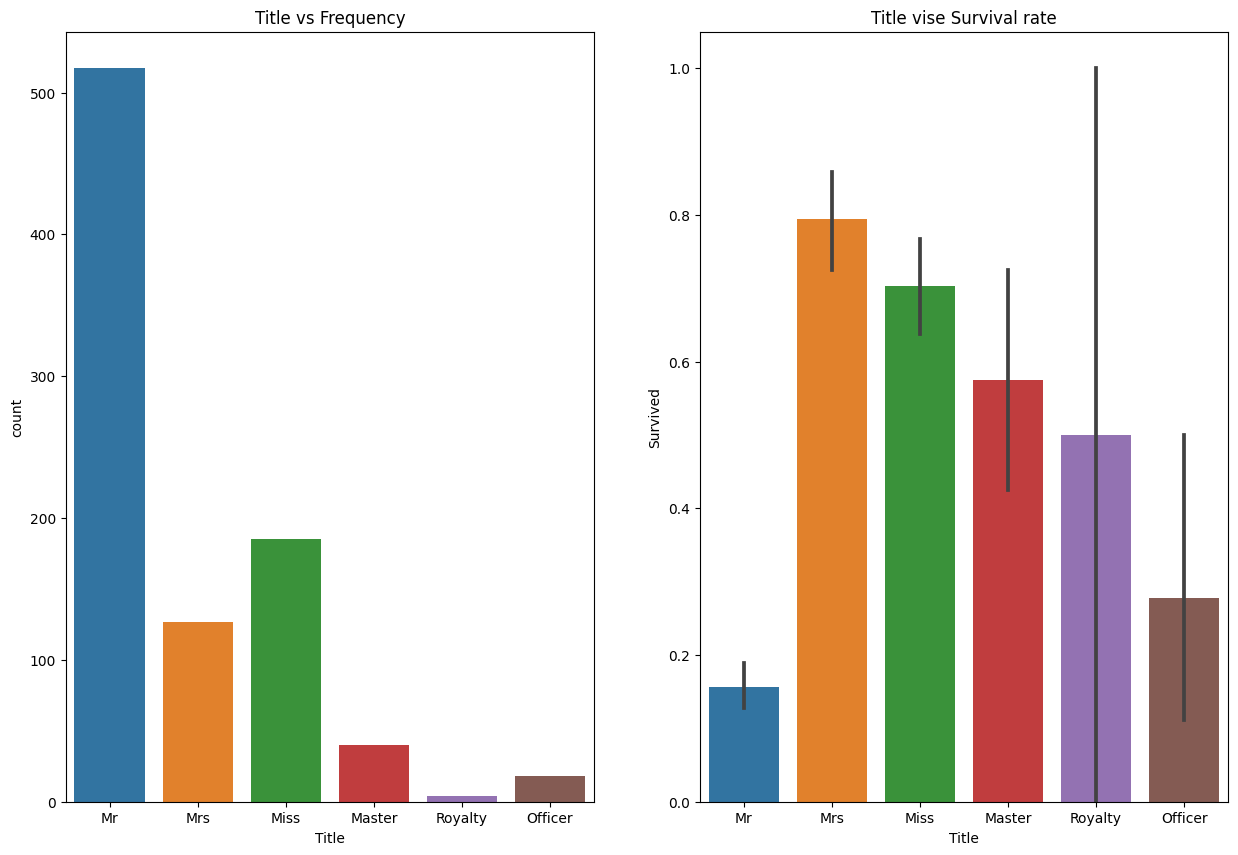

In [15]:
fx, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=titanic_train, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=titanic_train, x='Title',y='Survived', ax=axes[1])


(array([[201., 498., 166.,  25.,   1.],
        [100., 168.,  67.,   6.,   1.],
        [101., 330.,  99.,  19.,   0.]]),
 array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 3 BarContainer objects>)

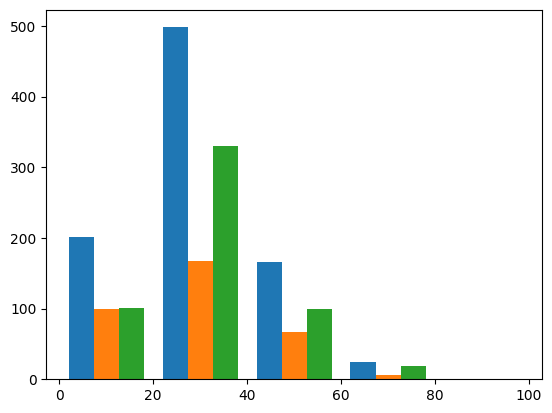

In [16]:
survived = titanic_train[titanic_train.Survived == 1].Age
dead = titanic_train[titanic_train.Survived == 0].Age
plt.hist([titanic_train.Age, survived, dead], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])

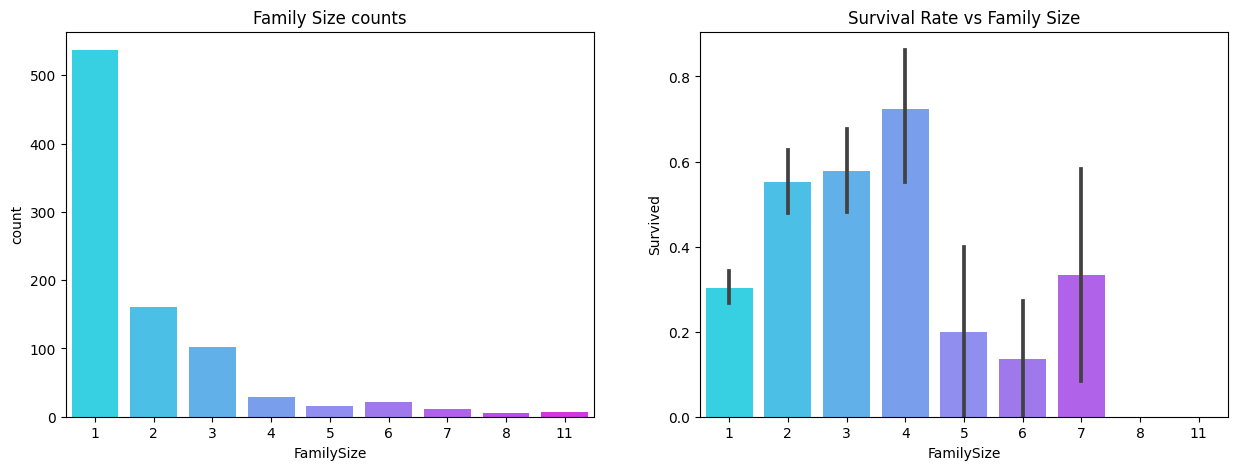

In [17]:
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Family Size counts')
axes[1].set_title('Survival Rate vs Family Size')
fig1_family = sns.countplot(x=titanic_train.FamilySize, ax=axes[0], palette='cool')
fig2_family = sns.barplot(x=titanic_train.FamilySize, y=titanic_train.Survived, ax=axes[1], palette='cool')

In [18]:
print(titanic_train['Embarked'].value_counts())
print(titanic_test['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [19]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna('S')

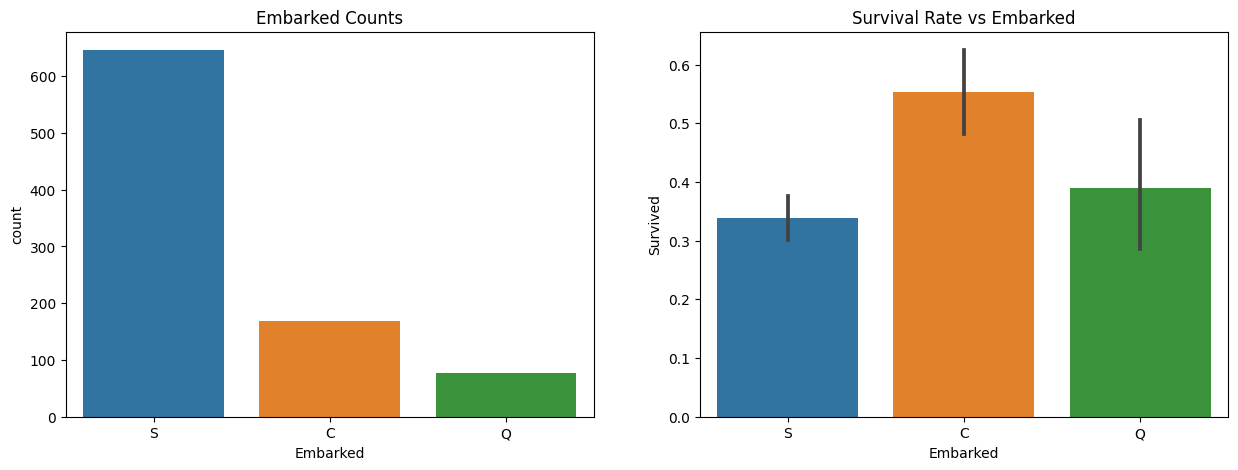

In [20]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=titanic_train.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=titanic_train.Embarked, y=titanic_train.Survived, ax=axes[1])

In [21]:
titanic_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [22]:
titanic_test['Fare'][np.isnan(titanic_test['Fare'])] = titanic_test.Fare.mean()

C:\Users\sande\AppData\Local\Temp\ipykernel_45268\971390476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test['Fare'][np.isnan(titanic_test['Fare'])] = titanic_test.Fare.mean()


In [23]:
cabin_null_train = float(titanic_train.Cabin.isnull().sum())
cabin_null_test = float(titanic_test.Cabin.isnull().sum())
print(cabin_null_train/len(titanic_train) *100)
print(cabin_null_test/len(titanic_test) *100)

77.10437710437711
78.22966507177034


In [24]:
titanic_train['hasCabin'] = titanic_train.Cabin.notnull().astype(int)
titanic_test['hasCabin'] = titanic_test.Cabin.notnull().astype(int)

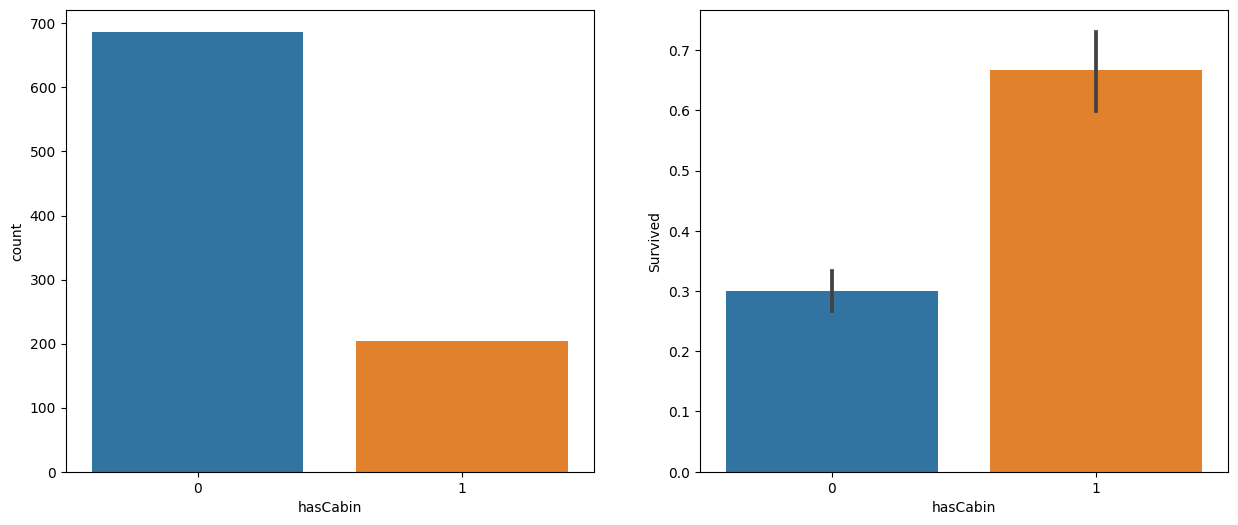

In [25]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_hascabin = sns.countplot(data=titanic_train, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=titanic_train, x='hasCabin', y='Survived', ax=axes[1])

In [26]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0


In [27]:
titanic_train.drop(['Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [28]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,hasCabin
0,1,0,3,male,22.0,7.2500,S,Mr,2,0
1,2,1,1,female,38.0,71.2833,C,Mrs,2,1
2,3,1,3,female,26.0,7.9250,S,Miss,1,0
3,4,1,1,female,35.0,53.1000,S,Mrs,2,1
4,5,0,3,male,35.0,8.0500,S,Mr,1,0


In [40]:
titanic_train.isnull().sum()
titanic_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,hasCabin
0,1,0,3,0,22.0,7.2500,2,2,2,0
1,2,1,1,1,38.0,71.2833,0,3,2,1
2,3,1,3,1,26.0,7.9250,2,1,1,0
3,4,1,1,1,35.0,53.1000,2,3,2,1
4,5,0,3,0,35.0,8.0500,2,2,1,0


In [30]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
titanic_train['Embarked'] = model.fit_transform(titanic_train['Embarked'])
titanic_train['Title']=model.fit_transform(titanic_train['Title'])
titanic_train.Sex = titanic_train.Sex.map({"male": 0, "female":1})

In [31]:
X = titanic_train.iloc[:, 1:9].values
y = titanic_train.iloc[:, 0].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [34]:
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)
print(svc_lin.score(X_train, Y_train))

0.851123595505618


In [45]:
svc_lin.fit(X_test, Y_test)
print(svc_lin.score(X_test, Y_test))

0.9441340782122905


In [35]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
print(gauss.score(X_train, Y_train))

0.8876404494382022


In [42]:
gauss.fit(X_test, Y_test)
print(gauss.score(X_test, Y_test))

0.9608938547486033


In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
print(forest.score(X_train,Y_train))


0.8707865168539326


In [41]:
forest.fit(X_test, Y_test)
print(forest.score(X_test, Y_test))

0.9553072625698324


In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.tree as tree 
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth= 10)

In [38]:

model.fit(X_train, Y_train)
print(model.score(X_train, Y_train))

0.8876404494382022


In [46]:
model.fit(X_test, Y_test)
val2=model.score(X_test, Y_test)
print(val2)

0.9608938547486033
